In [1]:
# 아주 긴 사이즈의 문장을 sequencing 할 때 size로 잘라서 사용한다.

In [18]:
import torch.nn
import torch.optim as optim
import numpy as np

In [19]:
sentence = ("if you want to build a ship, don't drum up people together to "
            "collect wood and don't assign them tasks and work, but rather "
            "teach them to long for the endless immensity of the sea.")

In [20]:
char_set = list(set(sentence))
char_dic = {c: i for i, c in enumerate(char_set)}

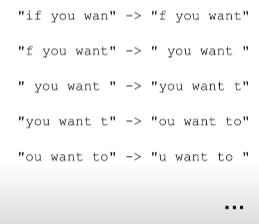

In [21]:
dic_size = len(char_dic)
hidden_size = len(char_dic)
sequence_length = 10
learning_rate = 0.1

In [22]:
# data slicing
x_data = []
y_data = []

for i in range(0, len(sentence) - sequence_length):
    x_str = sentence[i:i + sequence_length] # 각 길이 설정의 의미는 무엇일까?
    y_str = sentence[i + 1: i + sequence_length + 1]
    print(i, x_str, "->", y_str)
    x_data.append([char_dic[c] for c in x_str])
    y_data.append([char_dic[c] for c in y_str])
    
x_one_hot = [np.eye(dic_size)[x] for x in x_data]

X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)

0 if you wan -> f you want
1 f you want ->  you want 
2  you want  -> you want t
3 you want t -> ou want to
4 ou want to -> u want to 
5 u want to  ->  want to b
6  want to b -> want to bu
7 want to bu -> ant to bui
8 ant to bui -> nt to buil
9 nt to buil -> t to build
10 t to build ->  to build 
11  to build  -> to build a
12 to build a -> o build a 
13 o build a  ->  build a s
14  build a s -> build a sh
15 build a sh -> uild a shi
16 uild a shi -> ild a ship
17 ild a ship -> ld a ship,
18 ld a ship, -> d a ship, 
19 d a ship,  ->  a ship, d
20  a ship, d -> a ship, do
21 a ship, do ->  ship, don
22  ship, don -> ship, don'
23 ship, don' -> hip, don't
24 hip, don't -> ip, don't 
25 ip, don't  -> p, don't d
26 p, don't d -> , don't dr
27 , don't dr ->  don't dru
28  don't dru -> don't drum
29 don't drum -> on't drum 
30 on't drum  -> n't drum u
31 n't drum u -> 't drum up
32 't drum up -> t drum up 
33 t drum up  ->  drum up p
34  drum up p -> drum up pe
35 drum up pe -> rum up peo
36

 sequence_length만큼 길이의 sample을 여러개만들어 X,Y의 값을 지정한다
 

# Adding FC layer and stacking RNN - 모델을 좀 더 크게 만들고 싶을 경우


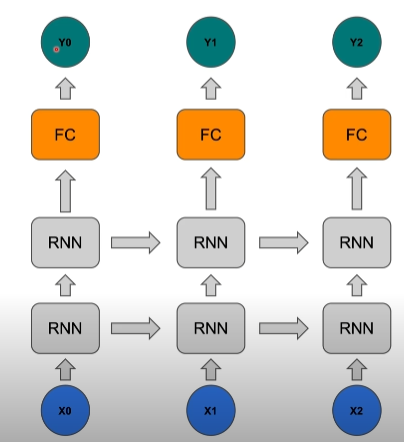

In [29]:
class Net(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, layers):
        super(Net,self).__init__()
        self.rnn = torch.nn.RNN(input_dim, hidden_dim,num_layers=layers,batch_first=True)
        self.fc = torch.nn.Linear(hidden_dim, hidden_dim, bias=True)
        
    def forward(self,x):
        x, _status = self.rnn(x)
        x = self.fc(x)
        return x
    
net = Net(dic_size, hidden_size,2)

In [37]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), learning_rate)

for i in range(100):
    optimizer.zero_grad()
    outputs = net(X)
    loss = criterion(outputs.view(-1,dic_size),Y.view(-1)) # view(-1의 의미)
    loss.backward()
    optimizer.step()
    
    result = outputs.argmax(dim=2)
    predict_str= ""
    for j,result in enumerate(result):
        print(i,j,''.join([char_set[t] for t in result]), loss.item())
        if j==0:
            predict_str +=''.join([char_set[t] for t in result])
        else:
            predict_str += char_set[result[-1]] # result[-1]의 의미
            

0 0 g you want 0.2343774437904358
0 1 oyou want  0.2343774437904358
0 2 tou want t 0.2343774437904358
0 3  u want to 0.2343774437904358
0 4 n want to  0.2343774437904358
0 5 pwant to b 0.2343774437904358
0 6 tont to bu 0.2343774437904358
0 7 ont to bui 0.2343774437904358
0 8 nd to buil 0.2343774437904358
0 9 d to build 0.2343774437904358
0 10  ao build  0.2343774437904358
0 11 to build a 0.2343774437904358
0 12   build a  0.2343774437904358
0 13 nbuild a s 0.2343774437904358
0 14 tuild a sh 0.2343774437904358
0 15 uild a shi 0.2343774437904358
0 16 pld a ship 0.2343774437904358
0 17 gd a ship, 0.2343774437904358
0 18 e a ship,  0.2343774437904358
0 19  anship, d 0.2343774437904358
0 20 tnship, do 0.2343774437904358
0 21 nship, don 0.2343774437904358
0 22 thip, don' 0.2343774437904358
0 23 iip, don't 0.2343774437904358
0 24 ep, don't  0.2343774437904358
0 25 g, don't d 0.2343774437904358
0 26   don't dr 0.2343774437904358
0 27  bon't dru 0.2343774437904358
0 28 ton't arum 0.234377443790

2 82 t rshignet 1.912794589996338
2 83 hwfhigneth 1.912794589996338
2 84 t k gnothe 1.912794589996338
2 85 ckign ihen 1.912794589996338
2 86 hignoihens 1.912794589996338
2 87 htn therst 1.912794589996338
2 88 pn'ihensty 1.912794589996338
2 89  dtheretys 1.912794589996338
2 90 'thenstysk 1.912794589996338
2 91 taen tysks 1.912794589996338
2 92 hen tysks  1.912794589996338
2 93 i  ty ks a 1.912794589996338
2 94 n thsks an 1.912794589996338
2 95 euf ks ant 1.912794589996338
2 96 tawks antl 1.912794589996338
2 97 hlks antlw 1.912794589996338
2 98 cks ant wo 1.912794589996338
2 99 hs tnt wor 1.912794589996338
2 100 s int work 1.912794589996338
2 101 hi doworst 1.912794589996338
2 102 t d workt  1.912794589996338
2 103 cd workt b 1.912794589996338
2 104 'lworst bu 1.912794589996338
2 105 otonst but 1.912794589996338
2 106 taost but  1.912794589996338
2 107 orsh lut t 1.912794589996338
2 108 n t tut wa 1.912794589996338
2 109 kt tut wag 1.912794589996338
2 110 s but tngh 1.912794589996338
2 1

5 13 pbuild t s 1.1028660535812378
5 14 autlm t sh 1.1028660535812378
5 15 uilm t shi 1.1028660535812378
5 16 mlo tnship 1.1028660535812378
5 17 ly tnship, 1.1028660535812378
5 18 e a ship,  1.1028660535812378
5 19  anship, b 1.1028660535812378
5 20 anship, to 1.1028660535812378
5 21 sship, ton 1.1028660535812378
5 22 ahap, bon' 1.1028660535812378
5 23 sip, ton't 1.1028660535812378
5 24 ep, ton't  1.1028660535812378
5 25 lp bon't a 1.1028660535812378
5 26 , bon't ar 1.1028660535812378
5 27  bon'thd   1.1028660535812378
5 28 aon't a um 1.1028660535812378
5 29  n't a um  1.1028660535812378
5 30 p't arum a 1.1028660535812378
5 31 dt a em ap 1.1028660535812378
5 32 t arum ap  1.1028660535812378
5 33 htrum ap p 1.1028660535812378
5 34 aodm ap te 1.1028660535812378
5 35  um ap tes 1.1028660535812378
5 36  m ap peep 1.1028660535812378
5 37 m ap pespl 1.1028660535812378
5 38  up peepee 1.1028660535812378
5 39 ap tesples 1.1028660535812378
5 40 mepe plest 1.1028660535812378
5 41 ,cesplesto 1.10

7 103 nd work, b 0.8308485746383667
7 104 d work, bu 0.8308485746383667
7 105  aork, but 0.8308485746383667
7 106 work, but  0.8308485746383667
7 107 ark, but r 0.8308485746383667
7 108   , but ra 0.8308485746383667
7 109  , but ran 0.8308485746383667
7 110 , but ranh 0.8308485746383667
7 111  but rashe 0.8308485746383667
7 112 wut rather 0.8308485746383667
7 113 ui rather  0.8308485746383667
7 114 p rather t 0.8308485746383667
7 115  tather te 0.8308485746383667
7 116 wosher tea 0.8308485746383667
7 117  ther teac 0.8308485746383667
7 118 nher teach 0.8308485746383667
7 119  e  thach  0.8308485746383667
7 120 er thdch t 0.8308485746383667
7 121   todch th 0.8308485746383667
7 122  toecp the 0.8308485746383667
7 123 wo ss them 0.8308485746383667
7 124  dch them  0.8308485746383667
7 125  sp them t 0.8308485746383667
7 126 nh them to 0.8308485746383667
7 127 o doem ta  0.8308485746383667
7 128 ethem ta l 0.8308485746383667
7 129 woem ta lo 0.8308485746383667
7 130  e  to lop 0.830848574

9 166   rf the e 0.6350163817405701
9 167  tf the eu 0.6350163817405701
9 168 wr themeun 0.6350163817405701
9 169   bhe eun. 0.6350163817405701
10 0 l youcwant 0.6070436835289001
10 1  taygwant  0.6070436835289001
10 2 tookwant t 0.6070436835289001
10 3  uc ang to 0.6070436835289001
10 4   want to  0.6070436835289001
10 5 twant to b 0.6070436835289001
10 6 tond to lu 0.6070436835289001
10 7 ont to bui 0.6070436835289001
10 8 nd do luil 0.6070436835289001
10 9 g do luild 0.6070436835289001
10 10 oto luildo 0.6070436835289001
10 11 th bui d t 0.6070436835289001
10 12 o but d t  0.6070436835289001
10 13  cuild t s 0.6070436835289001
10 14 tutld t sh 0.6070436835289001
10 15 uild t shi 0.6070436835289001
10 16 tln t ship 0.6070436835289001
10 17 ld tnship, 0.6070436835289001
10 18 ecusship,  0.6070436835289001
10 19  anship, d 0.6070436835289001
10 20 tnship, do 0.6070436835289001
10 21 nship, don 0.6070436835289001
10 22 thip, don' 0.6070436835289001
10 23 iip, don't 0.6070436835289001
10

12 73  and don't 0.5478907227516174
12 74 tnd don't  0.5478907227516174
12 75 nd won't a 0.5478907227516174
12 76 sldon't as 0.5478907227516174
12 77  aon't ass 0.5478907227516174
12 78 ton't assi 0.5478907227516174
12 79  n't assig 0.5478907227516174
12 80 n't assign 0.5478907227516174
12 81 st assign  0.5478907227516174
12 82 t tssign t 0.5478907227516174
12 83 otssign th 0.5478907227516174
12 84 tnsign the 0.5478907227516174
12 85 nsign them 0.5478907227516174
12 86  ign them  0.5478907227516174
12 87  gn them t 0.5478907227516174
12 88 gn them th 0.5478907227516174
12 89 ndthe  ths 0.5478907227516174
12 90 stiem tosk 0.5478907227516174
12 91 toe  tosks 0.5478907227516174
12 92 oe  thsks  0.5478907227516174
12 93 er tosks a 0.5478907227516174
12 94 n tosks an 0.5478907227516174
12 95  tasks and 0.5478907227516174
12 96 to ks and  0.5478907227516174
12 97 osss wnd d 0.5478907227516174
12 98 nss and do 0.5478907227516174
12 99  s and dor 0.5478907227516174
12 100 s tnd dork 0.54789072

15 2 tou want t 0.46327224373817444
15 3 ou want to 0.46327224373817444
15 4 n want to  0.46327224373817444
15 5 twant to b 0.46327224373817444
15 6 tont to bu 0.46327224373817444
15 7 ont to bui 0.46327224373817444
15 8  d to buil 0.46327224373817444
15 9 d do build 0.46327224373817444
15 10 oao build  0.46327224373817444
15 11 to luild a 0.46327224373817444
15 12 o luild a  0.46327224373817444
15 13 nluild t s 0.46327224373817444
15 14 tutld a sh 0.46327224373817444
15 15 uild t shi 0.46327224373817444
15 16 tld a ship 0.46327224373817444
15 17 ld anship, 0.46327224373817444
15 18 e a ship,  0.46327224373817444
15 19  anthip, d 0.46327224373817444
15 20 t ship, do 0.46327224373817444
15 21  ship, don 0.46327224373817444
15 22 thip, don' 0.46327224373817444
15 23  ip, don't 0.46327224373817444
15 24 et, don't  0.46327224373817444
15 25 l, don't a 0.46327224373817444
15 26 e don't ar 0.46327224373817444
15 27  don't aru 0.46327224373817444
15 28 ton't arum 0.46327224373817444
15 29  n'

17 103  d workt b 0.41819167137145996
17 104 ' work, bu 0.41819167137145996
17 105  aork, but 0.41819167137145996
17 106 tork, but  0.41819167137145996
17 107 ook, but r 0.41819167137145996
17 108   , but ra 0.41819167137145996
17 109  , but rat 0.41819167137145996
17 110 s but rath 0.41819167137145996
17 111  dut rathe 0.41819167137145996
17 112 tut rather 0.41819167137145996
17 113 ui rather  0.41819167137145996
17 114 t rather t 0.41819167137145996
17 115  aather te 0.41819167137145996
17 116 tather tea 0.41819167137145996
17 117  ther teac 0.41819167137145996
17 118  h r teach 0.41819167137145996
17 119  e  toach  0.41819167137145996
17 120 em teach t 0.41819167137145996
17 121 r toach th 0.41819167137145996
17 122  toash the 0.41819167137145996
17 123 toach them 0.41819167137145996
17 124  ash them  0.41819167137145996
17 125 rch them t 0.41819167137145996
17 126  h them ta 0.41819167137145996
17 127 t phem ta  0.41819167137145996
17 128 ephem to l 0.41819167137145996
17 129 toem 

20 19 ldnship, d 0.36977383494377136
20 20 tnship, do 0.36977383494377136
20 21 sship, don 0.36977383494377136
20 22 thip, don' 0.36977383494377136
20 23  ip, don't 0.36977383494377136
20 24 ep, don't  0.36977383494377136
20 25 p, don't d 0.36977383494377136
20 26 e don't dr 0.36977383494377136
20 27  don't dru 0.36977383494377136
20 28 ton't arum 0.36977383494377136
20 29 ln't drum  0.36977383494377136
20 30 ngt drum u 0.36977383494377136
20 31 dt drum up 0.36977383494377136
20 32 t arum up  0.36977383494377136
20 33 odrum up p 0.36977383494377136
20 34 toum up pe 0.36977383494377136
20 35 lum up peo 0.36977383494377136
20 36  m up peop 0.36977383494377136
20 37   up peopl 0.36977383494377136
20 38  tp people 0.36977383494377136
20 39 tp people  0.36977383494377136
20 40   people t 0.36977383494377136
20 41 epeople to 0.36977383494377136
20 42 teople tog 0.36977383494377136
20 43 eople toge 0.36977383494377136
20 44 rple toget 0.36977383494377136
20 45 nle togeth 0.36977383494377136
2

22 39 tp people  0.3497408628463745
22 40 p people t 0.3497408628463745
22 41 epeople to 0.3497408628463745
22 42 teople tog 0.3497408628463745
22 43 eople toge 0.3497408628463745
22 44 aple toget 0.3497408628463745
22 45 nle togeth 0.3497408628463745
22 46 ee togethe 0.3497408628463745
22 47 estogether 0.3497408628463745
22 48 alogether  0.3497408628463745
22 49 to ether t 0.3497408628463745
22 50 o ether to 0.3497408628463745
22 51 nether to  0.3497408628463745
22 52 ether to c 0.3497408628463745
22 53 aher to co 0.3497408628463745
22 54 oem to col 0.3497408628463745
22 55 er te coll 0.3497408628463745
22 56 a to colle 0.3497408628463745
22 57  to collec 0.3497408628463745
22 58 to lollect 0.3497408628463745
22 59 o lollect  0.3497408628463745
22 60 nlollect w 0.3497408628463745
22 61 tollect wo 0.3497408628463745
22 62 ollect woo 0.3497408628463745
22 63 nlect wood 0.3497408628463745
22 64 ee t wood  0.3497408628463745
22 65 est wood a 0.3497408628463745
22 66 at wood an 0.349740862

24 144 n the endl 0.3401195704936981
24 145  toe endle 0.3401195704936981
24 146 toemendles 0.3401195704936981
24 147 hemendless 0.3401195704936981
24 148 erendless  0.3401195704936981
24 149 olndless i 0.3401195704936981
24 150 tndless im 0.3401195704936981
24 151 odless imm 0.3401195704936981
24 152 t ess imme 0.3401195704936981
24 153  ess immen 0.3401195704936981
24 154 ess immens 0.3401195704936981
24 155 os immensi 0.3401195704936981
24 156 s immensit 0.3401195704936981
24 157 simmensity 0.3401195704936981
24 158 tmiensity  0.3401195704936981
24 159 pmensity o 0.3401195704936981
24 160  ensity of 0.3401195704936981
24 161  nsity of  0.3401195704936981
24 162 odity of t 0.3401195704936981
24 163 tity of th 0.3401195704936981
24 164 sty of the 0.3401195704936981
24 165 py of the  0.3401195704936981
24 166 h of the e 0.3401195704936981
24 167  of the ee 0.3401195704936981
24 168 tf the eea 0.3401195704936981
24 169 n the eea. 0.3401195704936981
25 0 p you want 0.33144092559814453
25

27 66  t wood an 0.3164983093738556
27 67 t wood and 0.3164983093738556
27 68 haood and  0.3164983093738556
27 69 tood and d 0.3164983093738556
27 70 ood and do 0.3164983093738556
27 71  d and don 0.3164983093738556
27 72   and don' 0.3164983093738556
27 73  and don't 0.3164983093738556
27 74 tnd won't  0.3164983093738556
27 75 nd don't a 0.3164983093738556
27 76 d won't as 0.3164983093738556
27 77  aon't ass 0.3164983093738556
27 78 ton't assi 0.3164983093738556
27 79  n't assig 0.3164983093738556
27 80  't dssign 0.3164983093738556
27 81 dt dssign  0.3164983093738556
27 82 t dssign t 0.3164983093738556
27 83 hassign th 0.3164983093738556
27 84 tnsign the 0.3164983093738556
27 85 nsign them 0.3164983093738556
27 86 i gn them  0.3164983093738556
27 87 ign them t 0.3164983093738556
27 88 pn them to 0.3164983093738556
27 89 e them tos 0.3164983093738556
27 90 dthem tosk 0.3164983093738556
27 91 toem tosks 0.3164983093738556
27 92 hem tosks  0.3164983093738556
27 93 er tosks a 0.316498309

29 129 toem to lo 0.3050936758518219
29 130  em to lon 0.3050936758518219
29 131 er to long 0.3050936758518219
29 132   to long  0.3050936758518219
29 133  ta long f 0.3050936758518219
29 134 to long fo 0.3050936758518219
29 135   long for 0.3050936758518219
29 136  bong for  0.3050936758518219
29 137 tong for t 0.3050936758518219
29 138 eng for th 0.3050936758518219
29 139  ' for the 0.3050936758518219
29 140 d for the  0.3050936758518219
29 141 efor the e 0.3050936758518219
29 142 tor the sn 0.3050936758518219
29 143  r the end 0.3050936758518219
29 144   the endl 0.3050936758518219
29 145  tee endle 0.3050936758518219
29 146 toemendles 0.3050936758518219
29 147  emendless 0.3050936758518219
29 148 erendless  0.3050936758518219
29 149  endless i 0.3050936758518219
29 150 tndless im 0.3050936758518219
29 151  dless imm 0.3050936758518219
29 152 d ess imme 0.3050936758518219
29 153  ess immen 0.3050936758518219
29 154 ecs immens 0.3050936758518219
29 155  s immensi 0.3050936758518219
2

32 39 tp people  0.2933579683303833
32 40 t people t 0.2933579683303833
32 41  people to 0.2933579683303833
32 42 teople tog 0.2933579683303833
32 43  ople toge 0.2933579683303833
32 44  ple toget 0.2933579683303833
32 45  le togeth 0.2933579683303833
32 46  e togethe 0.2933579683303833
32 47 estogether 0.2933579683303833
32 48  sogether  0.2933579683303833
32 49 to ether t 0.2933579683303833
32 50   ether te 0.2933579683303833
32 51  ether to  0.2933579683303833
32 52 ether to c 0.2933579683303833
32 53  her to co 0.2933579683303833
32 54  er te col 0.2933579683303833
32 55 er te coll 0.2933579683303833
32 56   te colle 0.2933579683303833
32 57  to collec 0.2933579683303833
32 58 to lollect 0.2933579683303833
32 59   collect  0.2933579683303833
32 60  bollect w 0.2933579683303833
32 61 tollect wo 0.2933579683303833
32 62 tllect woo 0.2933579683303833
32 63  lect wood 0.2933579683303833
32 64 eest wood  0.2933579683303833
32 65 est wood a 0.2933579683303833
32 66  t wood an 0.293357968

34 51  ether to  0.28418198227882385
34 52 ether to c 0.28418198227882385
34 53  her to co 0.28418198227882385
34 54  er te col 0.28418198227882385
34 55 er to coll 0.28418198227882385
34 56   to colle 0.28418198227882385
34 57  to collec 0.28418198227882385
34 58 to lollect 0.28418198227882385
34 59   collect  0.28418198227882385
34 60  lollect w 0.28418198227882385
34 61 tollect wo 0.28418198227882385
34 62 hllect woo 0.28418198227882385
34 63  lect wood 0.28418198227882385
34 64 eect wood  0.28418198227882385
34 65 ect wood a 0.28418198227882385
34 66  t wood an 0.28418198227882385
34 67 h wood and 0.28418198227882385
34 68  dood and  0.28418198227882385
34 69 tord and d 0.28418198227882385
34 70 ood and do 0.28418198227882385
34 71  d and don 0.28418198227882385
34 72   and don' 0.28418198227882385
34 73  and don't 0.28418198227882385
34 74 t d won't  0.28418198227882385
34 75 nd don't a 0.28418198227882385
34 76 d won't as 0.28418198227882385
34 77  aon't ass 0.28418198227882385
3

36 71 nd and don 0.2770806550979614
36 72 n and don' 0.2770806550979614
36 73  and don't 0.2770806550979614
36 74 tnd won't  0.2770806550979614
36 75 nd don't a 0.2770806550979614
36 76 d won't as 0.2770806550979614
36 77  aon't ass 0.2770806550979614
36 78 ton't dssi 0.2770806550979614
36 79  n't assig 0.2770806550979614
36 80 n't dssign 0.2770806550979614
36 81 dt dssign  0.2770806550979614
36 82 t dssign t 0.2770806550979614
36 83 oassign th 0.2770806550979614
36 84 tnsign the 0.2770806550979614
36 85 nkign them 0.2770806550979614
36 86 i gn them  0.2770806550979614
36 87 itn them t 0.2770806550979614
36 88 ln them to 0.2770806550979614
36 89 e them tas 0.2770806550979614
36 90 dthem task 0.2770806550979614
36 91 toem tasks 0.2770806550979614
36 92 oer tasks  0.2770806550979614
36 93 er tasks a 0.2770806550979614
36 94   tosks an 0.2770806550979614
36 95  tasks and 0.2770806550979614
36 96 tosks and  0.2770806550979614
36 97 osks and w 0.2770806550979614
36 98 nks and wo 0.277080655

38 158 tmmensity  0.2715510129928589
38 159 lmensity o 0.2715510129928589
38 160  ensity of 0.2715510129928589
38 161  nsity of  0.2715510129928589
38 162  sity of t 0.2715510129928589
38 163 dity of th 0.2715510129928589
38 164 sgy of the 0.2715510129928589
38 165 ly of the  0.2715510129928589
38 166 o of the s 0.2715510129928589
38 167 oof the se 0.2715510129928589
38 168 tf the sea 0.2715510129928589
38 169   the sea. 0.2715510129928589
39 0 l you want 0.2686091959476471
39 1 oyou want  0.2686091959476471
39 2 tou want t 0.2686091959476471
39 3 ou want to 0.2686091959476471
39 4   want to  0.2686091959476471
39 5 pwant to b 0.2686091959476471
39 6 tont to bu 0.2686091959476471
39 7 ont to bui 0.2686091959476471
39 8 nd to buil 0.2686091959476471
39 9 d ao build 0.2686091959476471
39 10 oao build  0.2686091959476471
39 11 to luild a 0.2686091959476471
39 12 o luild a  0.2686091959476471
39 13  luild a s 0.2686091959476471
39 14 tuild a sh 0.2686091959476471
39 15 utld a shi 0.2686091

41 40 p people t 0.26327991485595703
41 41  people to 0.26327991485595703
41 42 teople tog 0.26327991485595703
41 43  ople toge 0.26327991485595703
41 44  ple toget 0.26327991485595703
41 45  le togeth 0.26327991485595703
41 46  e togethe 0.26327991485595703
41 47 estogether 0.26327991485595703
41 48  eogether  0.26327991485595703
41 49 to ether t 0.26327991485595703
41 50 h ether to 0.26327991485595703
41 51  ether to  0.26327991485595703
41 52 nther to c 0.26327991485595703
41 53  her to co 0.26327991485595703
41 54 hem to col 0.26327991485595703
41 55 em to coll 0.26327991485595703
41 56   te colle 0.26327991485595703
41 57  th collec 0.26327991485595703
41 58 to lollect 0.26327991485595703
41 59 h lollect  0.26327991485595703
41 60  lollect w 0.26327991485595703
41 61 tollect wo 0.26327991485595703
41 62 hllect woo 0.26327991485595703
41 63  lect wood 0.26327991485595703
41 64 eect wood  0.26327991485595703
41 65 est wood a 0.26327991485595703
41 66  t wood an 0.26327991485595703
4

43 127 h them to  0.25919395685195923
43 128 ethem to l 0.25919395685195923
43 129 toem ta lo 0.25919395685195923
43 130  em ta lon 0.25919395685195923
43 131 er to long 0.25919395685195923
43 132   ta long  0.25919395685195923
43 133  ta long f 0.25919395685195923
43 134 to long fo 0.25919395685195923
43 135   long for 0.25919395685195923
43 136  cong for  0.25919395685195923
43 137 tong for t 0.25919395685195923
43 138 eng for th 0.25919395685195923
43 139  ' for the 0.25919395685195923
43 140 d for the  0.25919395685195923
43 141 nfor the e 0.25919395685195923
43 142 tor the en 0.25919395685195923
43 143 or the end 0.25919395685195923
43 144  kthe endl 0.25919395685195923
43 145  tee endle 0.25919395685195923
43 146 toemendles 0.25919395685195923
43 147  emendless 0.25919395685195923
43 148 erendless  0.25919395685195923
43 149  endless i 0.25919395685195923
43 150 tndless im 0.25919395685195923
43 151  sless imm 0.25919395685195923
43 152 d ess imme 0.25919395685195923
43 153  ess 

45 150 tndless im 0.25569790601730347
45 151  sless imm 0.25569790601730347
45 152 d ess imme 0.25569790601730347
45 153  ess immen 0.25569790601730347
45 154 ecs immens 0.25569790601730347
45 155  s immensi 0.25569790601730347
45 156 iiimmensit 0.25569790601730347
45 157 iimmensity 0.25569790601730347
45 158 tmmensity  0.25569790601730347
45 159 fmensity o 0.25569790601730347
45 160  ensity of 0.25569790601730347
45 161  nsity of  0.25569790601730347
45 162  sity of t 0.25569790601730347
45 163 dity of th 0.25569790601730347
45 164 ity of the 0.25569790601730347
45 165 fy of the  0.25569790601730347
45 166   of the s 0.25569790601730347
45 167 oof the se 0.25569790601730347
45 168 tf the sea 0.25569790601730347
45 169   the sea. 0.25569790601730347
46 0 f you want 0.25396406650543213
46 1 oyou want  0.25396406650543213
46 2 tou want t 0.25396406650543213
46 3  u want to 0.25396406650543213
46 4   want to  0.25396406650543213
46 5 twant to b 0.25396406650543213
46 6 tont to bu 0.253964

48 46 ,e togethe 0.2513843774795532
48 47 estogether 0.2513843774795532
48 48  eogether  0.2513843774795532
48 49 to ether t 0.2513843774795532
48 50   ether to 0.2513843774795532
48 51 nether to  0.2513843774795532
48 52  ther to c 0.2513843774795532
48 53  her to co 0.2513843774795532
48 54  em te col 0.2513843774795532
48 55 em te coll 0.2513843774795532
48 56   te colle 0.2513843774795532
48 57  to collec 0.2513843774795532
48 58 to collect 0.2513843774795532
48 59   bollect  0.2513843774795532
48 60 nbollect w 0.2513843774795532
48 61 tollect wo 0.2513843774795532
48 62 hllect woo 0.2513843774795532
48 63 nlect wood 0.2513843774795532
48 64 eect wood  0.2513843774795532
48 65 est wood a 0.2513843774795532
48 66  t wood an 0.2513843774795532
48 67 h wood and 0.2513843774795532
48 68  aood and  0.2513843774795532
48 69 tord and d 0.2513843774795532
48 70 ood and do 0.2513843774795532
48 71 nd and don 0.2513843774795532
48 72 n and don' 0.2513843774795532
48 73  a d don't 0.251384377

50 120 em teach t 0.24927619099617004
50 121   toach th 0.24927619099617004
50 122  toach the 0.24927619099617004
50 123 toach them 0.24927619099617004
50 124  ach them  0.24927619099617004
50 125  ch them t 0.24927619099617004
50 126 nh them to 0.24927619099617004
50 127 o them to  0.24927619099617004
50 128 ethem to l 0.24927619099617004
50 129 toem ta lo 0.24927619099617004
50 130  er ta lon 0.24927619099617004
50 131 em ta long 0.24927619099617004
50 132   to long  0.24927619099617004
50 133  to long f 0.24927619099617004
50 134 to cong fo 0.24927619099617004
50 135   bong for 0.24927619099617004
50 136 nlong for  0.24927619099617004
50 137 tong for t 0.24927619099617004
50 138 eng for th 0.24927619099617004
50 139 n' for the 0.24927619099617004
50 140 d for the  0.24927619099617004
50 141 efor the e 0.24927619099617004
50 142 tor the en 0.24927619099617004
50 143  r the end 0.24927619099617004
50 144 n the endl 0.24927619099617004
50 145  toe endle 0.24927619099617004
50 146 toeme

53 32 t drum up  0.24665121734142303
53 33 harum up p 0.24665121734142303
53 34 toum up pe 0.24665121734142303
53 35  um up peo 0.24665121734142303
53 36  m up peop 0.24665121734142303
53 37   up peopl 0.24665121734142303
53 38  tp people 0.24665121734142303
53 39 tp people  0.24665121734142303
53 40   people t 0.24665121734142303
53 41 lpeople to 0.24665121734142303
53 42 teople tog 0.24665121734142303
53 43 lople toge 0.24665121734142303
53 44 nple toget 0.24665121734142303
53 45 nle togeth 0.24665121734142303
53 46 le togethe 0.24665121734142303
53 47 estogether 0.24665121734142303
53 48 neogether  0.24665121734142303
53 49 to ether t 0.24665121734142303
53 50 h ether to 0.24665121734142303
53 51 nether to  0.24665121734142303
53 52 ether to c 0.24665121734142303
53 53 nher to co 0.24665121734142303
53 54 her to col 0.24665121734142303
53 55 er te coll 0.24665121734142303
53 56 n to colle 0.24665121734142303
53 57  to collec 0.24665121734142303
53 58 to lollect 0.24665121734142303
5

55 135   cong for 0.24491511285305023
55 136 ncong for  0.24491511285305023
55 137 tong for t 0.24491511285305023
55 138 eng for th 0.24491511285305023
55 139 n' for the 0.24491511285305023
55 140 d for the  0.24491511285305023
55 141 efor the e 0.24491511285305023
55 142 tor the en 0.24491511285305023
55 143 or the end 0.24491511285305023
55 144 n the endl 0.24491511285305023
55 145  toe endle 0.24491511285305023
55 146 toemendles 0.24491511285305023
55 147  emendless 0.24491511285305023
55 148 erendless  0.24491511285305023
55 149 nendless i 0.24491511285305023
55 150 tndless im 0.24491511285305023
55 151 nsless imm 0.24491511285305023
55 152 d ess imme 0.24491511285305023
55 153  ess immen 0.24491511285305023
55 154 ecs immens 0.24491511285305023
55 155 ns immensi 0.24491511285305023
55 156 s immensit 0.24491511285305023
55 157 simmensity 0.24491511285305023
55 158 tmmensity  0.24491511285305023
55 159 tmensity o 0.24491511285305023
55 160  ensity of 0.24491511285305023
55 161  nsit

58 62 ollect woo 0.24299877882003784
58 63  lect wood 0.24299877882003784
58 64 eect wood  0.24299877882003784
58 65 ect wood a 0.24299877882003784
58 66 nt wood an 0.24299877882003784
58 67 o wood and 0.24299877882003784
58 68  aood and  0.24299877882003784
58 69 tord and d 0.24299877882003784
58 70 ood and do 0.24299877882003784
58 71  d and don 0.24299877882003784
58 72   and don' 0.24299877882003784
58 73  and don't 0.24299877882003784
58 74 tnd won't  0.24299877882003784
58 75 nd won't a 0.24299877882003784
58 76 d won't as 0.24299877882003784
58 77  aon't ass 0.24299877882003784
58 78 ton't assi 0.24299877882003784
58 79  n't assig 0.24299877882003784
58 80  't dssign 0.24299877882003784
58 81 dt assign  0.24299877882003784
58 82 t assign t 0.24299877882003784
58 83  assign th 0.24299877882003784
58 84 tnsign the 0.24299877882003784
58 85 nkign them 0.24299877882003784
58 86 s gn them  0.24299877882003784
58 87 sgn them t 0.24299877882003784
58 88 ln them ta 0.24299877882003784
5

60 144  kthe endl 0.24200910329818726
60 145  toe endle 0.24200910329818726
60 146 toemendles 0.24200910329818726
60 147  emendless 0.24200910329818726
60 148 erendless  0.24200910329818726
60 149  endless i 0.24200910329818726
60 150 tndless im 0.24200910329818726
60 151  dless imm 0.24200910329818726
60 152 d ess imme 0.24200910329818726
60 153  ess immen 0.24200910329818726
60 154 e s immens 0.24200910329818726
60 155  s immensi 0.24200910329818726
60 156 s immensit 0.24200910329818726
60 157 simmensity 0.24200910329818726
60 158 tmmensity  0.24200910329818726
60 159 lmensity o 0.24200910329818726
60 160  ensity of 0.24200910329818726
60 161  nsity of  0.24200910329818726
60 162  dity of t 0.24200910329818726
60 163 dity of th 0.24200910329818726
60 164 sgy of the 0.24200910329818726
60 165 ly of the  0.24200910329818726
60 166   of the s 0.24200910329818726
60 167  of the se 0.24200910329818726
60 168 tf the sea 0.24200910329818726
60 169   the sea. 0.24200910329818726
61 0 t you w

63 48  eogether  0.24135415256023407
63 49 to ether t 0.24135415256023407
63 50 h ether to 0.24135415256023407
63 51  ether to  0.24135415256023407
63 52  ther to c 0.24135415256023407
63 53  her to co 0.24135415256023407
63 54 hem to col 0.24135415256023407
63 55 em to coll 0.24135415256023407
63 56   to colle 0.24135415256023407
63 57  to collec 0.24135415256023407
63 58 to lollect 0.24135415256023407
63 59 h lollect  0.24135415256023407
63 60  lollect w 0.24135415256023407
63 61 tollect wo 0.24135415256023407
63 62 ollect woo 0.24135415256023407
63 63  lect wood 0.24135415256023407
63 64 eect wood  0.24135415256023407
63 65 est wood a 0.24135415256023407
63 66  t wood an 0.24135415256023407
63 67 o wood and 0.24135415256023407
63 68 hdood and  0.24135415256023407
63 69 tord and d 0.24135415256023407
63 70 ood and do 0.24135415256023407
63 71  d and don 0.24135415256023407
63 72   and don' 0.24135415256023407
63 73  and don't 0.24135415256023407
63 74 tnd won't  0.24135415256023407
6

65 132   ta long  0.2423241138458252
65 133  to long f 0.2423241138458252
65 134 to cong fo 0.2423241138458252
65 135 h long for 0.2423241138458252
65 136  long for  0.2423241138458252
65 137 tong for t 0.2423241138458252
65 138 eng for th 0.2423241138458252
65 139  ' for the 0.2423241138458252
65 140 d for the  0.2423241138458252
65 141  for the e 0.2423241138458252
65 142 tor the en 0.2423241138458252
65 143 or the end 0.2423241138458252
65 144   the endl 0.2423241138458252
65 145  toe endle 0.2423241138458252
65 146 toemendles 0.2423241138458252
65 147 hemendless 0.2423241138458252
65 148 emendless  0.2423241138458252
65 149  endless i 0.2423241138458252
65 150 tndless im 0.2423241138458252
65 151  sless imm 0.2423241138458252
65 152 d ess imme 0.2423241138458252
65 153  ess immen 0.2423241138458252
65 154 ecs immens 0.2423241138458252
65 155  s immensi 0.2423241138458252
65 156 i immensit 0.2423241138458252
65 157 iimmensity 0.2423241138458252
65 158 tmmensity  0.2423241138458252
6

68 50 h ether to 0.24235782027244568
68 51  ether to  0.24235782027244568
68 52  ther to c 0.24235782027244568
68 53 rher to co 0.24235782027244568
68 54 hem to col 0.24235782027244568
68 55 em to coll 0.24235782027244568
68 56 r to colle 0.24235782027244568
68 57  to collec 0.24235782027244568
68 58 to collect 0.24235782027244568
68 59 h lollect  0.24235782027244568
68 60  lollect w 0.24235782027244568
68 61 tollect wo 0.24235782027244568
68 62 ollect woo 0.24235782027244568
68 63  lect wood 0.24235782027244568
68 64 eect wood  0.24235782027244568
68 65 ect wood a 0.24235782027244568
68 66 rt wood an 0.24235782027244568
68 67 o wood and 0.24235782027244568
68 68 hdood and  0.24235782027244568
68 69 tord and d 0.24235782027244568
68 70 ood and do 0.24235782027244568
68 71  d and don 0.24235782027244568
68 72   and don' 0.24235782027244568
68 73  and don't 0.24235782027244568
68 74 tnd won't  0.24235782027244568
68 75 nd don't a 0.24235782027244568
68 76 d don't as 0.24235782027244568
6

70 120 er teach t 0.24035565555095673
70 121 r teach th 0.24035565555095673
70 122  toach the 0.24035565555095673
70 123 toach them 0.24035565555095673
70 124  ach them  0.24035565555095673
70 125 rch them t 0.24035565555095673
70 126 nh them to 0.24035565555095673
70 127 h them to  0.24035565555095673
70 128 ethem to l 0.24035565555095673
70 129 toem ta lo 0.24035565555095673
70 130  er to lon 0.24035565555095673
70 131 er ta long 0.24035565555095673
70 132 r ta long  0.24035565555095673
70 133  ta long f 0.24035565555095673
70 134 to cong fo 0.24035565555095673
70 135   long for 0.24035565555095673
70 136  cong for  0.24035565555095673
70 137 tong for t 0.24035565555095673
70 138 eng for th 0.24035565555095673
70 139  ' for the 0.24035565555095673
70 140 d for the  0.24035565555095673
70 141  for the e 0.24035565555095673
70 142 tor the en 0.24035565555095673
70 143 or the end 0.24035565555095673
70 144  kthe endl 0.24035565555095673
70 145  toe endle 0.24035565555095673
70 146 toeme

73 34 toum up pe 0.2389078289270401
73 35  um up peo 0.2389078289270401
73 36  m up peop 0.2389078289270401
73 37 p up peopl 0.2389078289270401
73 38  tp people 0.2389078289270401
73 39 tp people  0.2389078289270401
73 40 p people t 0.2389078289270401
73 41 ,people to 0.2389078289270401
73 42 teople tog 0.2389078289270401
73 43 ,ople toge 0.2389078289270401
73 44 rple toget 0.2389078289270401
73 45  le togeth 0.2389078289270401
73 46 ,e togethe 0.2389078289270401
73 47 e together 0.2389078289270401
73 48 reogether  0.2389078289270401
73 49 th ether t 0.2389078289270401
73 50   ether to 0.2389078289270401
73 51  ether to  0.2389078289270401
73 52  ther to c 0.2389078289270401
73 53 rher to co 0.2389078289270401
73 54  er te col 0.2389078289270401
73 55 em to coll 0.2389078289270401
73 56 r to colle 0.2389078289270401
73 57  to collec 0.2389078289270401
73 58 th lollect 0.2389078289270401
73 59   collect  0.2389078289270401
73 60  lollect w 0.2389078289270401
73 61 tollect wo 0.238907828

75 115  tather te 0.23855026066303253
75 116 tather tea 0.23855026066303253
75 117  ther teac 0.23855026066303253
75 118 nher teach 0.23855026066303253
75 119  er toach  0.23855026066303253
75 120 er toach t 0.23855026066303253
75 121   toach th 0.23855026066303253
75 122  toach the 0.23855026066303253
75 123 toach them 0.23855026066303253
75 124  ach them  0.23855026066303253
75 125  ch them t 0.23855026066303253
75 126 nh them to 0.23855026066303253
75 127 t them to  0.23855026066303253
75 128 ethem to l 0.23855026066303253
75 129 toem to lo 0.23855026066303253
75 130  er to lon 0.23855026066303253
75 131 er ta long 0.23855026066303253
75 132   ta long  0.23855026066303253
75 133  to long f 0.23855026066303253
75 134 to cong fo 0.23855026066303253
75 135   long for 0.23855026066303253
75 136  cong for  0.23855026066303253
75 137 tong for t 0.23855026066303253
75 138 eng for th 0.23855026066303253
75 139  ' for the 0.23855026066303253
75 140 d for the  0.23855026066303253
75 141  for 

78 34 toum up pe 0.2372121959924698
78 35  um up peo 0.2372121959924698
78 36  m up peop 0.2372121959924698
78 37   up peopl 0.2372121959924698
78 38  tp people 0.2372121959924698
78 39 tp people  0.2372121959924698
78 40   people t 0.2372121959924698
78 41 ,people to 0.2372121959924698
78 42 teople tog 0.2372121959924698
78 43 ,ople toge 0.2372121959924698
78 44  ple toget 0.2372121959924698
78 45  le togeth 0.2372121959924698
78 46 ,e togethe 0.2372121959924698
78 47 e together 0.2372121959924698
78 48  together  0.2372121959924698
78 49 to ether t 0.2372121959924698
78 50   ether to 0.2372121959924698
78 51  ether to  0.2372121959924698
78 52  ther to c 0.2372121959924698
78 53  her to co 0.2372121959924698
78 54  er to col 0.2372121959924698
78 55 em to coll 0.2372121959924698
78 56   to colle 0.2372121959924698
78 57  th collec 0.2372121959924698
78 58 to lollect 0.2372121959924698
78 59   collect  0.2372121959924698
78 60  lollect w 0.2372121959924698
78 61 tollect wo 0.237212195

80 125  ch them t 0.2368156760931015
80 126 nh them to 0.2368156760931015
80 127 h them to  0.2368156760931015
80 128 ethem to l 0.2368156760931015
80 129 toem ta lo 0.2368156760931015
80 130 hem to lon 0.2368156760931015
80 131 er to long 0.2368156760931015
80 132   to long  0.2368156760931015
80 133  to long f 0.2368156760931015
80 134 to cong fo 0.2368156760931015
80 135 h long for 0.2368156760931015
80 136  cong for  0.2368156760931015
80 137 tong for t 0.2368156760931015
80 138 eng for th 0.2368156760931015
80 139  ' for the 0.2368156760931015
80 140 d for the  0.2368156760931015
80 141  for the e 0.2368156760931015
80 142 tor the en 0.2368156760931015
80 143  r the end 0.2368156760931015
80 144   the endl 0.2368156760931015
80 145  toe endle 0.2368156760931015
80 146 toemendles 0.2368156760931015
80 147 hemendless 0.2368156760931015
80 148 erendless  0.2368156760931015
80 149  tndless i 0.2368156760931015
80 150 tndless im 0.2368156760931015
80 151  dless imm 0.2368156760931015
8

83 3  u want to 0.23640260100364685
83 4   want to  0.23640260100364685
83 5 mwant to b 0.23640260100364685
83 6 tont to bu 0.23640260100364685
83 7 ont to bui 0.23640260100364685
83 8 nd to buil 0.23640260100364685
83 9 d to build 0.23640260100364685
83 10 hao build  0.23640260100364685
83 11 to cuild a 0.23640260100364685
83 12 h luild a  0.23640260100364685
83 13  cuild a s 0.23640260100364685
83 14 tutld a sh 0.23640260100364685
83 15 utld a shi 0.23640260100364685
83 16 mld a ship 0.23640260100364685
83 17 ld a ship, 0.23640260100364685
83 18 e a ship,  0.23640260100364685
83 19  anship, d 0.23640260100364685
83 20 tnship, do 0.23640260100364685
83 21 nship, don 0.23640260100364685
83 22 thip, don' 0.23640260100364685
83 23  ip, don't 0.23640260100364685
83 24 ep, don't  0.23640260100364685
83 25 l, don't d 0.23640260100364685
83 26 e don't dr 0.23640260100364685
83 27  bon't dru 0.23640260100364685
83 28 ton't drum 0.23640260100364685
83 29  n't arum  0.23640260100364685
83 30  '

85 88 tn them ta 0.2358514964580536
85 89 n them tas 0.2358514964580536
85 90 dthem task 0.2358514964580536
85 91 toem tasks 0.2358514964580536
85 92 hem tosks  0.2358514964580536
85 93 em tasks a 0.2358514964580536
85 94 m tasks an 0.2358514964580536
85 95  tosks and 0.2358514964580536
85 96 tosks and  0.2358514964580536
85 97 hsks and w 0.2358514964580536
85 98 nss and wo 0.2358514964580536
85 99  s and wor 0.2358514964580536
85 100 , and work 0.2358514964580536
85 101  ind work, 0.2358514964580536
85 102 tnd dork,  0.2358514964580536
85 103 nd dork, b 0.2358514964580536
85 104 d work, bu 0.2358514964580536
85 105  aork, but 0.2358514964580536
85 106 tork, but  0.2358514964580536
85 107 ook, but r 0.2358514964580536
85 108   , but ra 0.2358514964580536
85 109  , but rat 0.2358514964580536
85 110 , but rath 0.2358514964580536
85 111  dut rathe 0.2358514964580536
85 112 tui rather 0.2358514964580536
85 113 ui rather  0.2358514964580536
85 114 p rather t 0.2358514964580536
85 115 haathe

88 8 nd to buil 0.23518195748329163
88 9 d to build 0.23518195748329163
88 10  wo build  0.23518195748329163
88 11 to cuild a 0.23518195748329163
88 12   cuild a  0.23518195748329163
88 13  cuild a s 0.23518195748329163
88 14 tutld a sh 0.23518195748329163
88 15 utld a shi 0.23518195748329163
88 16 pld a ship 0.23518195748329163
88 17 td a ship, 0.23518195748329163
88 18 e a ship,  0.23518195748329163
88 19  anship, d 0.23518195748329163
88 20 tnship, do 0.23518195748329163
88 21 nship, don 0.23518195748329163
88 22 thip, don' 0.23518195748329163
88 23  ip, don't 0.23518195748329163
88 24 ep, don't  0.23518195748329163
88 25 t, don't d 0.23518195748329163
88 26 e don't dr 0.23518195748329163
88 27  don't dru 0.23518195748329163
88 28 ton't drum 0.23518195748329163
88 29  n't drum  0.23518195748329163
88 30  't arum u 0.23518195748329163
88 31 dt drum up 0.23518195748329163
88 32 t drum up  0.23518195748329163
88 33  wrum up p 0.23518195748329163
88 34 toum up pe 0.23518195748329163
88 

90 100 s and work 0.23500476777553558
90 101 sind work, 0.23500476777553558
90 102 tnd dork,  0.23500476777553558
90 103 nd work, b 0.23500476777553558
90 104 d work, bu 0.23500476777553558
90 105  aork, but 0.23500476777553558
90 106 tork, but  0.23500476777553558
90 107 ook, but r 0.23500476777553558
90 108  k, but ra 0.23500476777553558
90 109  , but rat 0.23500476777553558
90 110 s but rath 0.23500476777553558
90 111  but rathe 0.23500476777553558
90 112 tui rather 0.23500476777553558
90 113 ui rather  0.23500476777553558
90 114 p rather t 0.23500476777553558
90 115  aather te 0.23500476777553558
90 116 tather tea 0.23500476777553558
90 117  ther teac 0.23500476777553558
90 118 nher teach 0.23500476777553558
90 119  er toach  0.23500476777553558
90 120 em toach t 0.23500476777553558
90 121   toach th 0.23500476777553558
90 122  toach the 0.23500476777553558
90 123 toach them 0.23500476777553558
90 124  ach them  0.23500476777553558
90 125  ch them t 0.23500476777553558
90 126 nh th

93 26 , don't dr 0.23468568921089172
93 27  don't dru 0.23468568921089172
93 28 ton't arum 0.23468568921089172
93 29  n't arum  0.23468568921089172
93 30  't arum u 0.23468568921089172
93 31 dt arum up 0.23468568921089172
93 32 t arum up  0.23468568921089172
93 33  drum up p 0.23468568921089172
93 34 toum up pe 0.23468568921089172
93 35  um up peo 0.23468568921089172
93 36  m up peop 0.23468568921089172
93 37 m up peopl 0.23468568921089172
93 38  tp people 0.23468568921089172
93 39 tp people  0.23468568921089172
93 40 m people t 0.23468568921089172
93 41 ,people to 0.23468568921089172
93 42 teople tog 0.23468568921089172
93 43 ,ople toge 0.23468568921089172
93 44 rple toget 0.23468568921089172
93 45  le togeth 0.23468568921089172
93 46 ,e togethe 0.23468568921089172
93 47 estogether 0.23468568921089172
93 48 reogether  0.23468568921089172
93 49 to ether t 0.23468568921089172
93 50   ether to 0.23468568921089172
93 51  ether to  0.23468568921089172
93 52  ther to c 0.23468568921089172
9

95 131 er ta long 0.23448777198791504
95 132   ta long  0.23448777198791504
95 133  ta long f 0.23448777198791504
95 134 to long fo 0.23448777198791504
95 135   long for 0.23448777198791504
95 136  long for  0.23448777198791504
95 137 tong for t 0.23448777198791504
95 138 eng for th 0.23448777198791504
95 139  ' for the 0.23448777198791504
95 140 d for the  0.23448777198791504
95 141  for the e 0.23448777198791504
95 142 tor the en 0.23448777198791504
95 143 or the end 0.23448777198791504
95 144   the endl 0.23448777198791504
95 145  toe endle 0.23448777198791504
95 146 toemendles 0.23448777198791504
95 147  erendless 0.23448777198791504
95 148 erendless  0.23448777198791504
95 149  endless i 0.23448777198791504
95 150 tndless im 0.23448777198791504
95 151  sless imm 0.23448777198791504
95 152 d ess imme 0.23448777198791504
95 153  ess immen 0.23448777198791504
95 154 ess immens 0.23448777198791504
95 155  s immensi 0.23448777198791504
95 156 iiimmensit 0.23448777198791504
95 157 iimme

98 57  to collec 0.2344043254852295
98 58 to lollect 0.2344043254852295
98 59 h lollect  0.2344043254852295
98 60 ncollect w 0.2344043254852295
98 61 tollect wo 0.2344043254852295
98 62 tllect woo 0.2344043254852295
98 63 nlect wood 0.2344043254852295
98 64 eect wood  0.2344043254852295
98 65 ect wood a 0.2344043254852295
98 66  t wood an 0.2344043254852295
98 67 t wood and 0.2344043254852295
98 68 htood and  0.2344043254852295
98 69 tord and d 0.2344043254852295
98 70 ood and do 0.2344043254852295
98 71 nd and don 0.2344043254852295
98 72 n and don' 0.2344043254852295
98 73  and don't 0.2344043254852295
98 74 tnd won't  0.2344043254852295
98 75 nd don't a 0.2344043254852295
98 76 d won't as 0.2344043254852295
98 77  aon't ass 0.2344043254852295
98 78 ton't dssi 0.2344043254852295
98 79  n't dssig 0.2344043254852295
98 80 n't assign 0.2344043254852295
98 81 dt dssign  0.2344043254852295
98 82 t dssign t 0.2344043254852295
98 83 htssign th 0.2344043254852295
98 84 tnsign the 0.234404325